## Jupyter notebooks for BLaSA analysis and predictions
- Jupyter notebooks are a sequence of cells, whose output is stored
- Cells must be run for their output to be used
- Click on a cell or use <kbd>&#8593;</kbd> <kbd>&#8595;</kbd> keys to select
- To execute a cell type <kbd>ctrl</kbd>+<kbd>enter</kbd>

In [2]:
import os, time, glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

## Location of data files

In [3]:
with open("../input.json", "r") as f:
    input_data = json.load(f)
dump_folder = os.path.join('../run2',input_data['dump_folder'])
print(dump_folder)
a0 = input_data['potential']['a0']

../run2/sample_data


# Bond Correlation Analysis
## Pick parameters and load joint histograms
 For joint histograms to be generated the `JointHist` parameter in `input.json` must be set to `1`

In [27]:
# Specify as strings to guarantee match with filename
JH_RT = '0.1' # Relative Transverse strength
JH_T = '400' # Temperature
JH_am = '1.00' # Relative Lattice Parameter == 1 + Strain 

MarginalHistPath = glob.glob(os.path.join(dump_folder,"r_*_RT%s*T%s*a%s*" % (JH_RT,JH_T,JH_am)))
JointHistPath = glob.glob(os.path.join(dump_folder,"H_*S*_RT%s*T%s*a%s*" % (JH_RT,JH_T,JH_am)))

if len(JointHistPath) > 0 and len(MarginalHistPath)>0:
    print("Loading ",JointHistPath[0],MarginalHistPath[0])
    JointHist = np.loadtxt(JointHistPath[0])
    MarginalHist = np.loadtxt(MarginalHistPath[0])
else:
    print("Couldn't find files")

Loading  ../run2/sample_data/H_TL_N4_S75k_RT0.100000_T400.000000_a1.000000_M ../run2/sample_data/r_H_Hp_Hd_U_N4_S75k_RT0.100000_T400.000000_a1.000000_M


## Make figure

In [20]:
myc = {}
myc['r'] = (1.0,0.0,44./255.)
myc['b'] = (71./255.,0.0,167./255.)
myc['o'] = (1.0,180./255.,7./255.)
myc['g'] = (0.0/255.0,180./255.,7./255.)
lw=2.

38396804.0
1 0.08112340753564837
38398402.0
0 0.0015949541076735393
230380824.0
2 0.006250177866758611
230380824.0
3 0.005779427230389276


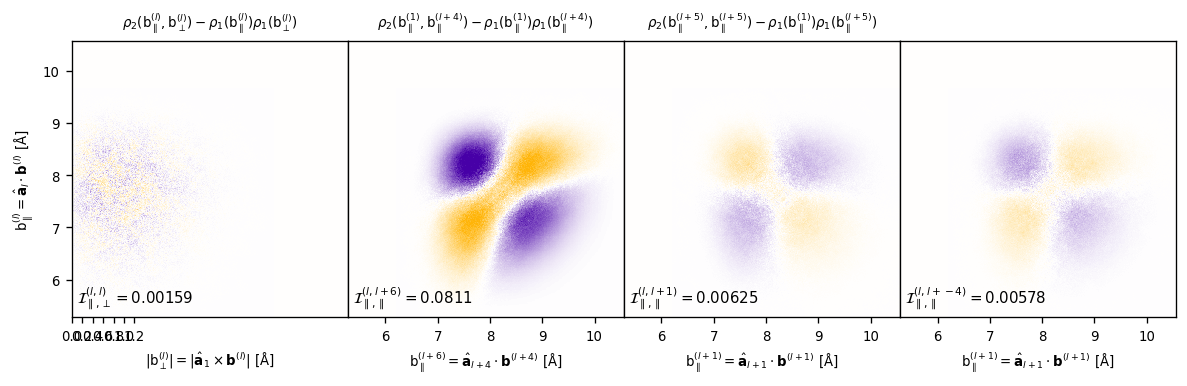

In [31]:

r = MarginalHist[:,0]
bins=r.size

H=JointHist



fig,axs=plt.subplots(1,4,figsize=(10,3),dpi=120,sharex=False,sharey=True)

tlims = [0,bins//4]#[0,700]
atlim = [r[tlims[0]]*a0-r[0]*a0,r[tlims[1]]*a0-r[0]*a0]

llims = [bins//4,bins//2]#[500,1200]
allim = [r[llims[0]]*a0,r[llims[1]]*a0]

for j in [1,0,2,3]:
    
    if j==0:
        M = H[(j)*bins*bins:(j+1)*bins*bins].reshape((bins,bins))[llims[0]:llims[1],tlims[0]:tlims[1]].copy()
        plim = [atlim[0],atlim[1],allim[0],allim[1]]
    else:
        M = H[(j)*bins*bins:(j+1)*bins*bins].reshape((bins,bins))[llims[0]:llims[1],llims[0]:llims[1]].copy()
        plim = [allim[0],allim[1],allim[0],allim[1]]
    print(M.sum())
    if M.sum()==0:
        continue
    M /= M.sum()
    rhol = M.sum(axis=0)
    rhor = M.sum(axis=1)
    ucjb = np.outer(rhor,rhol)
    
    sel = (ucjb>0.0) * (M>0.0)
    
    RE = -(np.log((M[sel])/ucjb[sel])*ucjb[sel]).sum()
    
    print(j,RE)
    
    M -= ucjb
    
    
    if j==1:
        mM = M.max()*0.8
    
    cm = mpl.colors.LinearSegmentedColormap.from_list('my_spec',[myc['b'],(1,1,1),myc['o']], N=200)
    
    axs[j].matshow(M,cmap=cm,extent=plim,vmin=-mM,vmax=mM)
    
    #axs[j].text(0.02,0.02,r"$\int\ln|\rho_1\rho_1/\rho_2|\rho_1\rho_1=%.3g$" % RE,\
    if j==0:
        axs[j].text(0.02,0.02,r"$\mathcal{I}^{(l,l)}_{\parallel,\perp}=%.3g$" % RE,\
             fontsize=9,transform=axs[j].transAxes,horizontalalignment='left',verticalalignment='bottom')
    else:
        axs[j].text(0.02,0.02,r"$\mathcal{I}^{(l,l+%d)}_{\parallel,\parallel}=%.3g$" % (6-5*(j-1),RE),\
             fontsize=9,transform=axs[j].transAxes,horizontalalignment='left',verticalalignment='bottom')
    
    
axs[0].set_title(r"$\rho_2({\rm b}^{(l)}_\parallel,{\rm b}^{(l)}_\perp)-\rho_1({\rm b}^{(l)}_\parallel)\rho_1({\rm b}^{(l)}_\perp)$",fontsize=8,pad=0)
axs[1].set_title(r"$\rho_2({\rm b}^{(1)}_\parallel,{\rm b}^{(l+4)}_\parallel)-\rho_1({\rm b}^{(1)}_\parallel)\rho_1({\rm b}^{(l+4)}_\parallel)$",fontsize=8,pad=0)
axs[2].set_title(r"$\rho_2({\rm b}^{(l+1)}_\parallel,{\rm b}^{(l+1)}_\parallel)-\rho_1({\rm b}^{(1)}_\parallel)\rho_1({\rm b}^{(l+1)}_\parallel)$",fontsize=8,pad=0)
axs[2].set_title(r"$\rho_2({\rm b}^{(l+5)}_\parallel,{\rm b}^{(l+5)}_\parallel)-\rho_1({\rm b}^{(1)}_\parallel)\rho_1({\rm b}^{(l+5)}_\parallel)$",fontsize=8,pad=0)

for j in range(4):
    axs[j].tick_params(labelsize=8)
    axs[j].tick_params(axis="x", bottom=True, labelbottom=True, top=False, labeltop=False)
    axs[j].tick_params(axis="y", left=False, labelleft=False, right=False, labelright=False)
axs[0].tick_params(axis="y", left=True, labelleft=True, right=False, labelright=False)
axs[0].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
axs[0].set_ylabel(r"${\rm b}^{(l)}_\parallel = \hat{\bf a}_{l}\cdot{\bf b}^{(l)}$ [$\rm\AA$]",fontsize=8)


axs[0].set_xlabel(r"$|{\rm b}^{(l)}_\perp| = |\hat{\bf a}_{1}\times{\bf b}^{(l)}|$ [$\rm\AA$]",fontsize=8)
axs[1].set_xlabel(r"${\rm b}^{(l+6)}_\parallel = \hat{\bf a}_{l+4}\cdot{\bf b}^{(l+4)}$ [$\rm\AA$]",fontsize=8)
axs[2].set_xlabel(r"${\rm b}^{(l+1)}_\parallel = \hat{\bf a}_{l+1}\cdot{\bf b}^{(l+1)}$ [$\rm\AA$]",fontsize=8)
axs[3].set_xlabel(r"${\rm b}^{(l+1)}_\parallel = \hat{\bf a}_{l+1}\cdot{\bf b}^{(l+1)}$ [$\rm\AA$]",fontsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.,hspace=0.)

plt.savefig("correlations_am%s_T%sK_RT%s.pdf" % (JH_RT,JH_T,JH_am) )